In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [62]:
train_data = pd.read_csv("C:/Users/banga/Downloads/archive (3)/train.csv")
test_data = pd.read_csv("C:/Users/banga/Downloads/archive (3)/test.csv")

In [64]:
train_data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [4]:
test_data.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [5]:
print(train_data.shape, test_data.shape)

(159571, 8) (153164, 2)


**PREPROCCESING**


**1. LOWERCASING THE TEXT**

In [6]:
train_data.comment_text = [text.lower() for text in train_data.comment_text]
test_data.comment_text = [text.lower() for text in test_data.comment_text]

**2. TOKENIZATION**

In [7]:
!pip install nltk

You should consider upgrading via the 'A:\py\python.exe -m pip install --upgrade pip' command.


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
from nltk.tokenize import word_tokenize
train_data.comment_text = [word_tokenize(text) for text in train_data.comment_text]
test_data.comment_text = [word_tokenize(text) for text in test_data.comment_text]

**3. REMOVING STOP WORDS**

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_data.comment_text = [word for word in train_data.comment_text if not word in stop]
test_data.comment_text = [word for word in test_data.comment_text if not word in stop]

**4. STEMMING AND LEMMATIZATION**

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banga\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stem = PorterStemmer()
lem = WordNetLemmatizer()

def stem_lem(data):
    lemmatized = []
    for text in data:
        final = []
        for word in text:
            #Check if the recursion depth does not exceed
            if len(word) < 990:
                stem.stem(word)
                final.append(lem.lemmatize(word))
        lemmatized.append(final)
    return lemmatized

train_data.comment_text = stem_lem(train_data.comment_text)
test_data.comment_text = stem_lem(test_data.comment_text)

**BULDING RNN WITH TENSORFLOW**

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, Bidirectional, LSTM
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Sequential
from keras.preprocessing import text
#from keras.utils import pad_sequences
from keras_preprocessing.sequence import pad_sequences

In [17]:
X_train = train_data["comment_text"]
y_train = train_data[["toxic", 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values
X_test = test_data["comment_text"]

tokenizer = text.Tokenizer()

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_l = 100

X_train = pad_sequences(X_train, maxlen = max_l)
X_test = pad_sequences(X_test, maxlen = max_l)

In [18]:
model = Sequential()
model.add(Embedding(20000, 50, input_shape = (100, )))
model.add(Bidirectional(LSTM(50, dropout=0.1)))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs',
                 histogram_freq=1, 
                 write_graph=True, 
                 write_images=False)

In [19]:
history = model.fit(X_train, y_train, epochs = 2, validation_split = 0.1, batch_size = 32, callbacks=[tensorboard])

Epoch 1/2
4488/4488 [==============================] - 216s 42ms/step - loss: 0.0657 - accuracy: 0.9511 - val_loss: 0.0525 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 175s 39ms/step - loss: 0.0479 - accuracy: 0.9888 - val_loss: 0.0511 - val_accuracy: 0.9940


Text(0, 0.5, 'accuracy')

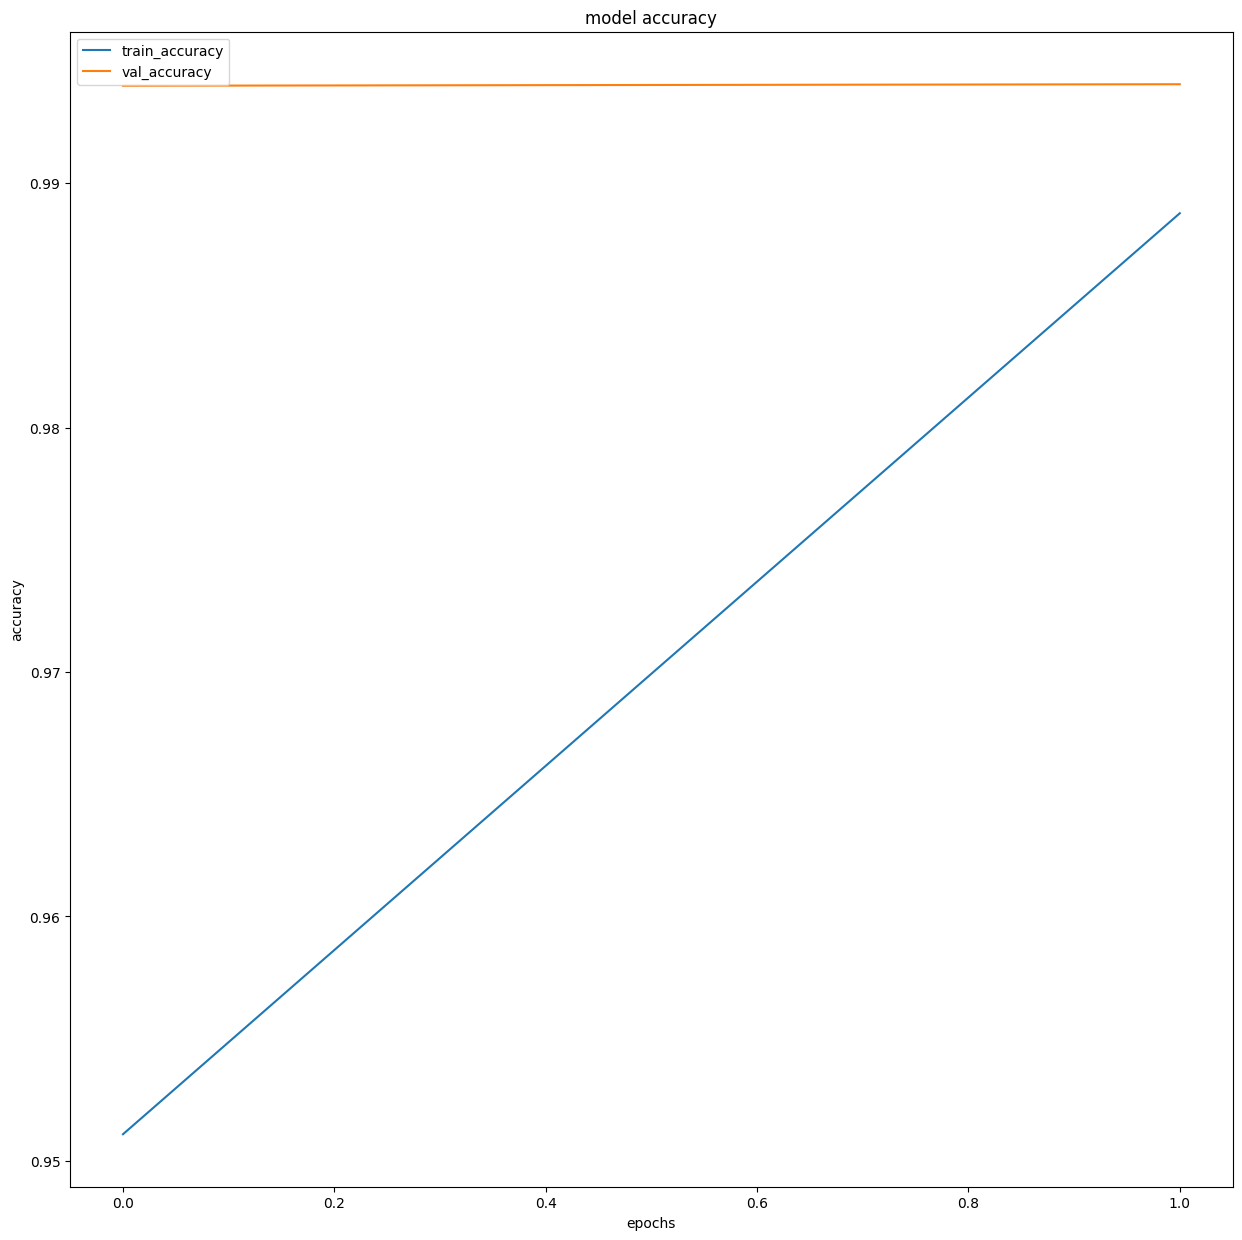

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 15))
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

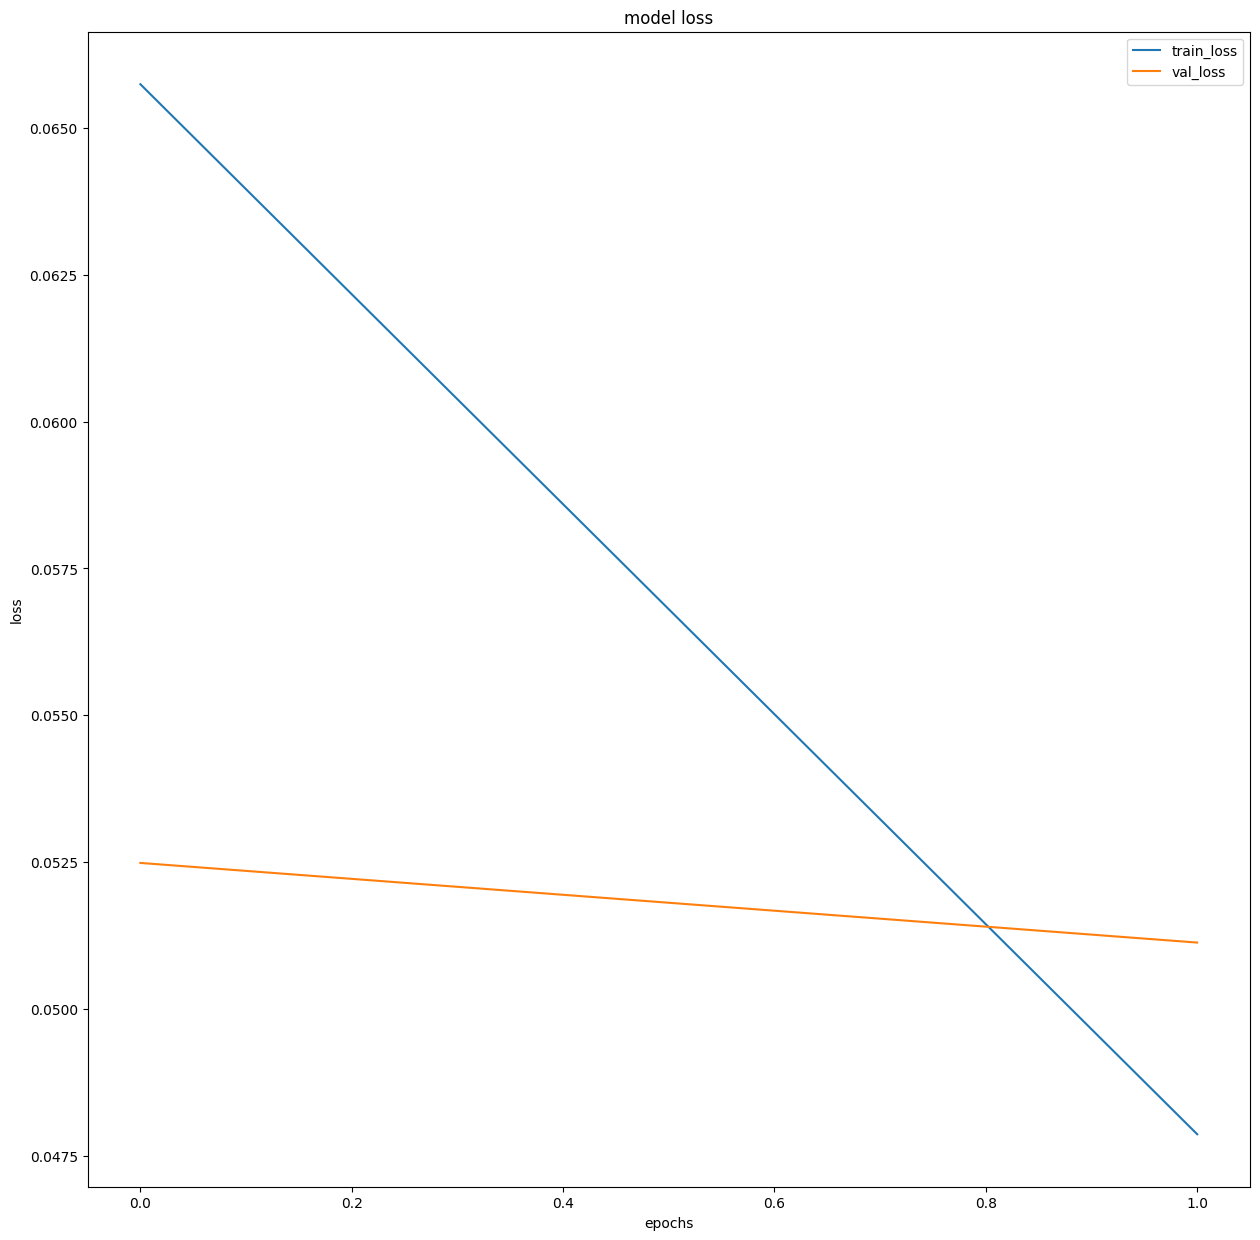

In [21]:
plt.figure(figsize= (15, 15))
plt.title('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [22]:
predictions = model.predict(X_test)

In [24]:
df = pd.DataFrame({'id': test_data['comment_text']})
cols = train_data[["toxic", 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
predictions_df = pd.concat([df, pd.DataFrame(predictions, columns = cols.columns)], axis=1)
predictions_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[yo, bitch, ja, rule, is, more, succesful, the...",0.991811,0.268654,0.955409,0.047575,0.838877,0.138394
1,"[==, from, rfc, ==, the, title, is, fine, a, i...",0.001148,0.000005,0.000260,0.000029,0.000177,0.000027
2,"[``, ==, source, ==, *, zawe, ashton, on, lapl...",0.006236,0.000025,0.001153,0.000140,0.000897,0.000170
3,"[:, if, you, have, a, look, back, at, the, sou...",0.001018,0.000004,0.000232,0.000027,0.000162,0.000023
4,"[i, do, n't, anonymously, edit, article, at, a...",0.002428,0.000011,0.000520,0.000065,0.000400,0.000065
...,...,...,...,...,...,...,...
153159,"[., i, totally, agree, ,, this, stuff, is, not...",0.021406,0.000146,0.003438,0.000805,0.004263,0.000845
153160,"[==, throw, from, out, field, to, home, plate,...",0.003171,0.000013,0.000528,0.000080,0.000460,0.000077
153161,"[``, ==, okinotorishima, category, ==, i, see,...",0.003221,0.000011,0.000579,0.000080,0.000481,0.000071
153162,"[``, ==, ``, '', one, of, the, founding, natio...",0.001734,0.000011,0.000605,0.000018,0.000246,0.000035


In [86]:
comment="hi iam back again"
comment = comment.lower()
comment = [word_tokenize(comment)]
comment = [word for word in comment if not word in stop]
comment = stem_lem(comment)
print(comment)
tokenizer.fit_on_texts(comment)
comment = tokenizer.texts_to_sequences(comment)

comment = pad_sequences(comment, maxlen = max_l)
result = model.predict(comment)

[['hi', 'iam', 'back', 'again']]


In [87]:
result

array([[3.2289405e-03, 2.7377255e-05, 8.7541935e-04, 1.2321257e-04,
        6.2305480e-04, 1.3208869e-04]], dtype=float32)